In [72]:

import sys
sys.path
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan')
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/OASIS-master')

import warnings
warnings.filterwarnings('ignore')

import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
import pyute as ut
import size_contrast_analysis as sca
import size_contrast_figures as scf
import size_contrast_opto_figures as scof
import opto_utils
import os
import scipy.stats as sst
reload(cc)
reload(utils)

<module 'calnet.utils' from '/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan/calnet/utils.py'>

In [73]:
cache_base = os.path.expanduser('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/cached/')
if not os.path.exists(cache_base):
    os.makedirs(cache_base)
cache_base = os.path.join(cache_base, "connection_deletion_sim_opto_layer4_")

In [74]:
calnet_base = os.path.expanduser('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/')
notebook_base = os.path.expanduser('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/simulation/Agos_Code/')

In [75]:
npyfile = np.load(f'{calnet_base}/calnet_data/dynamics/vip_both_pixels_opto_tavg_210513c.npy',allow_pickle=True)[()]
npyfile_halo = np.load(f'{calnet_base}/calnet_data/dynamics/vip_halo_l4_opto_tavg_connection_deletion_210513c.npy',allow_pickle=True)[()]
npyfile_chrimson = np.load(f'{calnet_base}/calnet_data/dynamics/vip_chrimson_l4_opto_tavg_connection_deletion_210513c.npy',allow_pickle=True)[()]

wtfile = '210513c'


In [76]:
npyfile.keys()

dict_keys(['YY_opto', 'YY_opto_no_pcpc', 'YY_opto_no_pcpv', 'YY_opto_tavg_no_pcvip', 'YY_opto_tavg_no_pcsst', 'YY_opto_tavg_no_vipbias', 'YY_opto_tavg_no_sstvip'])

In [77]:
# note: these simulations keep resEta, resXi fixed. Not Eta, Xi!
YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
YY_opto_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
YY_opto_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
YY_opto_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]

In [78]:
# weights_files = glob.glob(f'{notebook_base}/shared_data/calnet_data/weights/weights_201203g/*.npy')
weights_files = glob.glob(f'{calnet_base}/calnet_data/weights/weights_201215b/*.npy')
weights_files = glob.glob(f'{calnet_base}/calnet_data/weights/weights_210513c/*.npy')
weights_files.sort()

reload(cc)
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
losses = np.zeros((nwt,))
for iwt in range(nwt):
#     wtfile = 'weights_'+good_fits[iwt]+'.npy'
#     wtdict = np.load(wtbase+wtfile,allow_pickle=True)[()]
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)
    losses[iwt] = mdls[iwt].loss
    
mdls_no_pcpv = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][[0,0,3,3],[0,3,0,3]] = 0
    mdls_no_pcpv[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcpc = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,0] = 0
    mdls_no_pcpc[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcvip = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,2] = 0
    wtdict['Wmx'][0,2] = 0
    mdls_no_pcvip[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcsst = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,1] = 0
    wtdict['Wmx'][0,1] = 0
    mdls_no_pcsst[iwt] = cc.ModelOri(wtdict,nT=1)
        
mdls_no_vipbias = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmx'][1,2] = 0
    mdls_no_vipbias[iwt] = cc.ModelOri(wtdict,nT=1)
    
low_loss = (losses<np.nanpercentile(losses,10))

mdls = [mdl for (mdl,ll) in zip(mdls,low_loss) if ll]
mdls_no_pcpv = [mdl for (mdl,ll) in zip(mdls_no_pcpv,low_loss) if ll]
mdls_no_pcpc = [mdl for (mdl,ll) in zip(mdls_no_pcpc,low_loss) if ll]
mdls_no_pcvip = [mdl for (mdl,ll) in zip(mdls_no_pcvip,low_loss) if ll]
mdls_no_pcsst = [mdl for (mdl,ll) in zip(mdls_no_pcsst,low_loss) if ll]
mdls_no_vipbias = [mdl for (mdl,ll) in zip(mdls_no_vipbias,low_loss) if ll]

In [79]:
iwt = 0
nQ,nS,nT = mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
bltiles = np.zeros((nwt,nQ*nS*nT))
amps = np.ones((nwt,nQ*nS*nT))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    if 'bl' in wtdict:
        bl = wtdict['bl']
        bltiles[iwt] = np.tile(bl,nS*nT)
    if 'amp' in wtdict:
        amp = wtdict['amp']
        amps[iwt] = amp

In [102]:
this_npyfile['YY_opto'].shape

(94, 21, 36, 8)

In [81]:
opto_levels = 1*np.linspace(0,1,21)
# opto_levels = 1*np.linspace(-0.3,0.3,31)
# opto_levels = 1*np.linspace(-1.5,1.5,31)

network_resps = [None for idir in range(3)]
for idir,this_npyfile in enumerate([npyfile,npyfile_halo,npyfile_chrimson]):
# for idir,npyfile in enumerate([npyfile_coupled,npyfile_coupled,npyfile_coupled]):
    
#     YY_opto = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][low_loss,:,:,np.newaxis,:]
    YY_opto = this_npyfile['YY_opto'][:,:,:,np.newaxis,:]
    YY_opto_no_pcpc = this_npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
    YY_opto_no_pcpv = this_npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
    YY_opto_no_pcvip = this_npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
    YY_opto_no_pcsst = this_npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
    YY_opto_no_vipbias = this_npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]

    these_losses = losses[low_loss]
    
    nwt = len(mdls)
    iwt = 0
    itype = 0

    nN = mdls[iwt].nN
    ntypes = mdls[iwt].nQ*mdls[iwt].nS*mdls[iwt].nT
    this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
    # this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
    # this_mdl,this_YY = mdls.copy(),YY_opto.copy()
    YYs = [YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias]
    if idir>0:
        network_resps[idir] = [np.zeros((nwt,opto_levels.shape[0],nN,ntypes)) for YY in YYs]
    else:
        network_resps[idir] = [np.zeros((nwt,31,nN,ntypes)) for YY in YYs]
    mdlses = [mdls,mdls_no_pcpc,mdls_no_pcpv,mdls_no_pcvip,mdls_no_pcsst,mdls_no_vipbias]
#     mdlses = [[m for m,l in zip(mm,low_loss) if l] for mm in mdlses]
#     network_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcpc = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcpv = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcvip = np.zeros((nwt,3,nN,ntypes))
#     cell_intrinsic_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    for network_resp,YY in zip(network_resps[idir],YYs):
        for iwt in range(nwt):
            network_resp[iwt] = np.nanmean(YY[iwt],2)#[:opto_levels.shape[0]]
#     for iwt in range(nwt):
#         network_resp[iwt] = np.nanmean(YY_opto[iwt],2) # time avg
#         network_resp_no_pcpc[iwt] = np.nanmean(YY_opto_no_pcpc[iwt],2)
#         network_resp_no_pcpv[iwt] = np.nanmean(YY_opto_no_pcpv[iwt],2)
#         network_resp_no_pcvip[iwt] = np.nanmean(YY_opto_no_pcvip[iwt],2)

#         for ilevel in range(opto_levels.shape[0]):
#             cell_intrinsic_resp[iwt,ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)
            

In [107]:
len(network_resps[0])

6

In [82]:
idir = 2 # response to activation
iconn = 0 # baseline connectivity pattern
x = opto_levels
nr = network_resps[idir][iconn]

import naka_rushton_analysis as nra

def compute_two_asymptote_fit(x=None, nr=None):
    # 3 cell types: pc, sst, vip
    # 6 parameters: x0,a1,b1,a2,b2,lam; crossing over x-value, slope+intercepts at 
    # left and right asymptotes, and x-value scaling factor
    params = np.zeros((nr.shape[0],nr.shape[2],3,6))
    for istim in range(nr.shape[2]):
        for itype in range(3):
            print((istim,itype)) # fit a sigmoid to the positive VIP current response
            params[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
    return params

cache_file = cache_base + "cached_fit_opt_params_two_asymptote_fn.npy"
print(cache_file)
print(os.path.exists(cache_file))
params = ut.compute_or_load_cached(cache_file=cache_file, compute_fn=compute_two_asymptote_fit, 
    x=x, nr=nr)

# reload(nra)
# x = opto_levels#-opto_levels.min()#+1

# if os.path.exists(cache_file):
#     params = np.load(cache_file)
# else:
#     params = np.zeros((nr.shape[0],nr.shape[2],3,6))
#     for istim in range(nr.shape[2]):
#         for itype in range(3):
#             print((istim,itype))
#             params[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
#     np.save(cache_file, params)

/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/cached/connection_deletion_sim_opto_layer4_cached_fit_opt_params_two_asymptote_fn.npy
True
loading from cache...


In [83]:
idir = 2
iconn = 0
nr = network_resps[idir][iconn]

import naka_rushton_analysis as nra
reload(nra)
x = opto_levels#-opto_levels.min()#+1

cache_file = cache_base + "cached_fit_opt_params_two_asymptote_fn_cpl.npy"

# if os.path.exists(cache_file):
#     params_cpl = np.load(cache_file)
# else:
#     params_cpl = np.zeros((nr.shape[0],nr.shape[2],3,6))
#     for istim in range(nr.shape[2]):
#         print(istim)
#         for itype in range(3):
#             params_cpl[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
#     np.save(cache_file, params_cpl)

def compute_params_cpl(x=None, nr=None):
    params_cpl = np.zeros((nr.shape[0],nr.shape[2],3,6))
    for istim in range(nr.shape[2]):
        print(istim)
        for itype in range(3):
            params_cpl[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
    return params_cpl


In [84]:
pct_l,pct_u = 16,84
#YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias
these_opto_levels = np.linspace(-1.5, 1.5, 31)
# these_opto_levels = opto_levels.copy() # the shape of network_resp, etc., is no longer consistent with opto_levels
idir = 0
network_resp, network_resp_no_pcpc, network_resp_no_pcpv,\
network_resp_no_pcvip,network_resp_no_pcsst,network_resp_no_vipbias = network_resps[idir]



In [85]:
import sim_utils
def this_gen_size_tuning(flsc):
    shp = flsc.shape
    rflsc = flsc.reshape((shp[0]*shp[1],shp[2],shp[3]))
    size_tuning = sim_utils.gen_size_tuning(rflsc).reshape((shp[0],shp[1],shp[2]+1,shp[3]))
    return size_tuning

In [86]:
# import calnet.utils
# from importlib import reload
# reload(calnet.utils)
cache_file = cache_base + 'couplingses_Xcouplingses.pkl'
def compute_couplingses_Xcouplingses(**kwargs):
    network_resps = kwargs['network_resps']
    mdlses = kwargs['mdlses']
    couplingses = [[None for _ in network_resps[idir]] for idir in range(3)]
    for idir in range(3):
        for iconn in range(len(network_resps[idir])):
            couplingses[idir][iconn] = utils.compute_couplings(network_resps[idir][iconn],mdlses[iconn])
            
    Xcouplingses = [[None for _ in network_resps[idir]] for idir in range(3)]
    for idir in range(3):
        for iconn in range(len(network_resps[idir])):
            Xcouplingses[idir][iconn] = utils.compute_Xcouplings(network_resps[idir][iconn],mdlses[iconn])
    result = {}
    result['couplingses'] = couplingses
    result['Xcouplingses'] = Xcouplingses
    return result
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_couplingses_Xcouplingses,
    network_resps=network_resps,
    mdlses=mdlses,
    )
couplingses = result['couplingses']
Xcouplingses = result['Xcouplingses']


loading from cache...


In [87]:
# reload(calnet.utils)
this_nopto = 61
opto_mag = np.linspace(-3,3,this_nopto)
def compute_opto_coupling(mdlses, opto_mag):
    this_nopto = 61
    opto_coupling = np.zeros((nwt,this_nopto,6,6))
    for iwt in range(nwt):
        idir,iconn,ilight = 0,0,0
        i,j = 4,0
        tgt = couplingses[idir][iconn][iwt][ilight][0,0,i,j]
        for iopto in range(this_nopto):
            opto_coupling[iwt,iopto] = utils.compute_coupling_perturb_WW(mdlses[0][iwt],4,0,opto_mag[iopto])
    return opto_coupling
    
opto_coupling = ut.compute_or_load_cached(
    cache_file=cache_base + 'opto_coupling.npy',
    compute_fn=compute_opto_coupling,
    mdlses=mdlses,
    opto_mag=opto_mag,
)


loading from cache...


In [88]:
def compute_dw_to_zero(mdlses=None, couplingses=None):
    iconn = 0
    idir = 0
    ilight = 0
    i,j = 4,0
    nsize,ncontrast = 6,6
    dw_to_zero,cpl = [np.zeros((nwt,nsize,ncontrast)) for _ in range(2)]
    for iwt in range(nwt):
        tgt = couplingses[idir][iconn][iwt][ilight][0,0,i,j]
        print(iwt)
        for isize in range(nsize):
            for icontrast in range(ncontrast):
    #             istim = np.ravel_multi_index((isize,icontrast),(nsize,ncontrast))
                dw_to_zero[iwt,isize,icontrast],cpl[iwt,isize,icontrast] = utils.zero_coupling_optimize_dWW(mdlses[iconn][iwt],isize,icontrast,i,j,tgt=tgt)
    return dw_to_zero,cpl
cache_file = (cache_base + 'connection_deletion_sim_opto_layer4_dw_to_zero.pkl')
dw_to_zero,cpl = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_dw_to_zero,
    mdlses=mdlses,
    couplingses=couplingses,
    )

loading from cache...


In [89]:
def compute_ilight_drmax(couplingses=None):
    ilight_drmax = [[None for _ in couplingses[idir]] for idir in range(3)]
    i,j = 4,0
    for idir in range(3):
        ilight_drmax[idir] = [None for _ in couplingses[idir]]
        for iconn in range(len(network_resps[idir])):
            # shape: (94, 31, 6, 6, 8, 8)
            zero_contrast = couplingses[idir][iconn][:,:,:,0,i,j].max(2)
            full_contrast = couplingses[idir][iconn][:,:,:,-1,i,j].min(2)
            ilight_drmax[idir][iconn] = np.argmax(zero_contrast - full_contrast,axis=1)
    return ilight_drmax
cache_file = (cache_base + 'ilight_drmax.pkl')
ilight_drmax = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_drmax,
    couplingses=couplingses,
    )

loading from cache...


In [90]:
def compute_YY_opto(mdlses=None, dw_to_zero=None):
    YY_opto = np.zeros((nwt,2,nN,nQ*nS*nT))
    for iwt in range(nwt):
        print(iwt)
        for ilight in range(2):
            YY_opto[iwt,ilight] = utils.compute_YY_dw_mdl(mdlses[0][iwt],4,0,ilight*dw_to_zero[iwt].flatten())
    return YY_opto
cache_file = cache_base + 'YY_opto.npy'
YY_opto = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_YY_opto,
    mdlses=mdlses,
    dw_to_zero=dw_to_zero,
    )

loading from cache...


In [91]:
iconn

0

In [92]:
nsize, ncontrast = 6, 6
ibaseline=15

def compute_slope_intercept_res(xdata,ydata):
    xdata_norm = xdata/xdata.mean()[np.newaxis,np.newaxis]
    ydata_norm = ydata/xdata.mean()[np.newaxis,np.newaxis]
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    return slope,intercept,residual

def compute_slope_intercept_res_reshape(xdata,ydata):
    slope, intercept, residual = compute_slope_intercept_res(xdata,ydata)
    residual = residual.reshape((nsize, ncontrast))
    return slope,intercept,residual

def reshape_resps(network_resps, iconn=0):
    nopto = network_resps[1][0].shape[1]
    baseline = network_resps[0][iconn][:,ibaseline,:,:].reshape((-1, 1, nsize, ncontrast, ntypes))
    down = network_resps[1][iconn][:,:,:,:].reshape((-1, nopto, nsize, ncontrast, ntypes))
    up = network_resps[2][iconn][:,:,:,:].reshape((-1, nopto, nsize, ncontrast, ntypes))
    return baseline, down, up

def compute_slope_intercept_res_arr(network_resps):
    nconn = 6
    ndir = 2
    nopto = network_resps[1][0].shape[1]
    slope,intercept,res = [[[None for idir in range(ndir)] for iconn in range(nconn)] for _ in range(3)]
    for iconn in range(6):
        # (nfiles,nopto,nsize,ncontrast,ntypes)
        # xdata = network_resps[1][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes)) # halo
        # ydata = network_resps[2][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes)) # chrimson
        # # (nfiles,1,nsize,ncontrast,ntypes)
        # zdata = network_resps[0][iconn][:,:,:,:].reshape((-1,1,nsize,ncontrast,ntypes)) # ctrl
        zdata, xdata, ydata = reshape_resps(network_resps, iconn=iconn) # zdata: ctrl, xdata: halo, ydata: chrimson
        nfits = xdata.shape[0]
        for idir in range(2):
            slope[iconn][idir] = np.zeros(ydata.shape[:2]+ydata.shape[-1:])
            intercept[iconn][idir] = np.zeros(ydata.shape[:2]+ydata.shape[-1:])
            res[iconn][idir] = np.zeros(ydata.shape)
            for itype in range(ntypes):
                for ifit in range(nfits):
                    for iopto in range(nopto):
                        if idir==0:
                            (
                                slope[iconn][idir][ifit,iopto,itype],
                                intercept[iconn][idir][ifit,iopto,itype],
                                res[iconn][idir][ifit,iopto,:,:,itype]
                            ) = compute_slope_intercept_res_reshape(zdata[ifit,0,:,:,itype],xdata[ifit,iopto,:,:,itype])
                        if idir==1:
                            (
                                slope[iconn][idir][ifit,iopto,itype],
                                intercept[iconn][idir][ifit,iopto,itype],
                                res[iconn][idir][ifit,iopto,:,:,itype]
                            ) = compute_slope_intercept_res_reshape(zdata[ifit,0,:,:,itype],ydata[ifit,iopto,:,:,itype])
                        # res[iconn][idir][ifit,iopto,:,:,itype] = this_res.reshape((6,6))
    return slope, intercept, res

def compute_slope_intercept_res_dict(network_resps=None):
    slope, intercept, res = compute_slope_intercept_res_arr(network_resps)
    output_dict = {
        'slope': slope,
        'intercept': intercept,
        'res': res,
    }
    return output_dict

def compute_ilight_resmax(network_resps=None):
    nopto = network_resps[1][0].shape[1]#11 # number of opto stimuli; 11 seems out of date
    slope,intercept,res = [[[None for idir in range(2)] for iconn in range(6)] for _ in range(3)]
    ilight_resmax = [None for idir in range(3)]
    ndir = 3
    for idir in range(ndir):
        ilight_resmax[idir] = [None for iconn in range(6)]
    slope, intercept, res = compute_slope_intercept_res_arr(network_resps)
    sir_dict = ut.compute_or_load_cached(
        cache_file=cache_base + 'sir_dict.pkl',
        compute_fn=compute_slope_intercept_res_dict,
        network_resps=network_resps,
        # invalidate_caches=True,
    )
    slope, intercept, res = sir_dict['slope'], sir_dict['intercept'], sir_dict['res']
    nconn = len(slope)
    itype = 0
    for iconn in range(nconn):
        for idir in range(ndir-1):
            ilight_resmax[idir+1][iconn] = np.argmax(np.abs(res[iconn][idir]).sum(2).sum(2),axis=1)[:,itype]
        ilight_resmax[0][iconn] = np.zeros_like(ilight_resmax[1][iconn])
    result = {'slope':slope,'intercept':intercept,'res':res,'ilight_resmax':ilight_resmax}
    return result
cache_file = (cache_base + 'ilight_resmax.pkl')
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_resmax,
    network_resps=network_resps,
    )
slope = result['slope']
intercept = result['intercept']
res = result['res']
ilight_resmax = result['ilight_resmax']

loading from cache...


In [93]:
cache_file = (cache_base + 'ilight_resmax.pkl')
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_resmax,
    network_resps=network_resps,
    )
slope = result['slope']
intercept = result['intercept']
res = result['res']

loading from cache...


In [94]:
lkat.shape

(94,)

In [95]:
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat: non-divergent responses to positive VIP current

In [96]:
slope, intercept, res = compute_slope_intercept_res_arr(network_resps)



In [97]:
%load_ext autoreload
%autoreload 2

alpha = 0.5

izero = 15
zero_subtracted = True

norm_to_mean = True

# lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

reload(ut)

def plot_nonlinearity(opto_levels, network_resp,color,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = network_resp - network_resp[:,izero:izero+1]
    else:
        to_plot = network_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
    plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
    else:
        to_plot = cell_intrinsic_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
np.random.seed(0)
this_lkat = np.random.randint(lkat.sum())
this_lkat = slice(this_lkat, this_lkat+1)
    
# itype = 2
pct_l,pct_u = 16,84
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim, title in zip(
#     [0,5,35,18,20,23],
#     ['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']
#     ):
iconn = 0
nrs_list = [
    ([network_resps[idir][iconn] for idir in [1, 2]], False, 3),
    (
        [res[iconn][idir-1].reshape(res[iconn][idir-1].shape[:2] + (nsize*ncontrast, ntypes)) for idir in [1, 2]], 
        True,
        1
    )
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
res[iconn][idir-1];

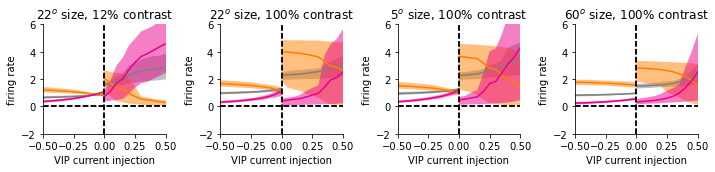

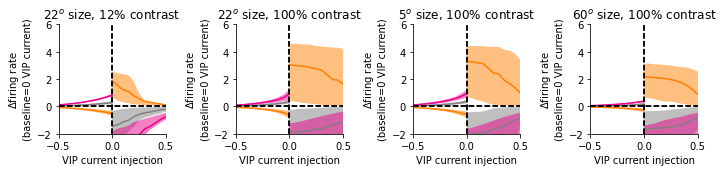

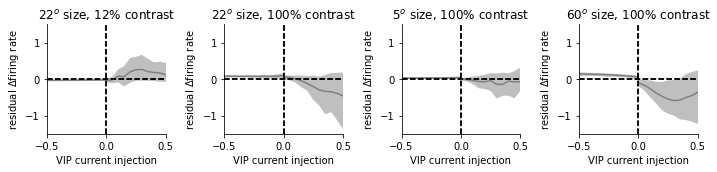

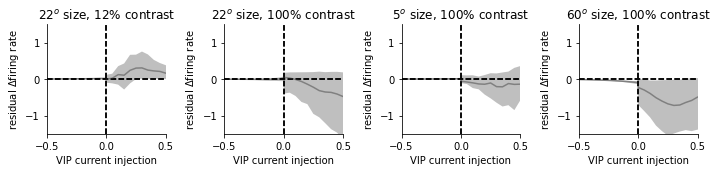

In [99]:

# nr_baselines_list = [
#     nr_baseline = network_resps[0][iconn],

# ]
nr_baseline = network_resps[0][iconn]
for nrs, is_res, this_ntype in nrs_list:
    for zero_subtracted in [False, True]:
        plt.figure(figsize=(10,2.5))
        for iistim, (istim,title) in enumerate([
            # (0, '0% contrast'),
            # (5, '5$^o$ size, 100% contrast'),
            # (35, '60$^o$ size, 100% contrast'),
            # (18, '0% contrast'),
            # (20, '22$^o$ size, 12% contrast'),
            # (23, '22$^o$ size, 100% contrast')
            (20, '22$^o$ size, 12% contrast'),
            (23, '22$^o$ size, 100% contrast'),
            (5, '5$^o$ size, 100% contrast'),
            (35, '60$^o$ size, 100% contrast'),
        ]):
            plt.subplot(1, 4, iistim+1)
            # plt.figure(figsize=(2.5,2.5))
        #     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
        #     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
        #     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
            
            iconn = 0
            
            # nrs = [network_resps[idir][iconn] for idir in [1, 2]] + [res[iconn][idir-1] for idir in [1, 2]]
            pos_neg_opto_levels = [-opto_levels, opto_levels] + [-opto_levels, opto_levels]
            
        #     cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
            cs = [np.array((0.5,0.5,0.5)),np.array((1,0.5,0)),np.array((236, 0, 140))/255,np.array((0,0,1))]
            lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']
            for iplot,(nr, these_opto_levels, c, lbl) in enumerate(zip(nrs, pos_neg_opto_levels, cs, lbls)):
                if norm_to_mean and not is_res:
                    nr = ut.norm_middle_axes_to_mean(nr[:,:,:,:],nr_baseline[:,15,:,:])
                # plt.subplot(1,4,iplot+1)
                for itype in range(this_ntype):
                    plot_nonlinearity(these_opto_levels, nr[lkat][:,:,istim,itype],
                        cs[itype], lbl, zero_subtracted=zero_subtracted)
        #             plot_nonlinearity(nr[lkat][this_lkat][:,:,istim,itype],cs[itype],lbl)
                plt.axvline(0,c='k',linestyle='dashed')
                plt.axhline(0,c='k',linestyle='dashed')
        #         plt.xlim((-1.5,1.5))
                plt.xlim((-0.5,0.5))
        #         plt.xlim((-0.25,0.25))
        #         plt.ylim((-1,3.5))
                if norm_to_mean and not is_res:
                    plt.ylim((-2,6))
                else:
                    # plt.ylim((-1,3))
                    plt.ylim((-1.5,1.5))
        #         plt.ylim((-0.75,2.5))
                ut.erase_top_right()

#                 plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
#                 plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)

#                 plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
#                 plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)

#                 plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
#                 plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)

            # plt.legend()
        #         plt.xlim((-1.5,1.5))
                    
                plt.xlabel('VIP current injection')
                if zero_subtracted:
                    plt.ylabel(r'$\Delta$firing rate'+'\n(baseline=0 VIP current)')
                else:
                    plt.ylabel('firing rate')
                if is_res:
                    plt.ylabel(r'residual $\Delta$firing rate')
            # plt.title('PC$\leftrightarrow$PC weights deleted')
            plt.tight_layout()
        #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
        #     plt.savefig('figures/sst_network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
            plt.title(title)
        plt.tight_layout()
        if not is_res:
            plt.savefig(notebook_base+f'/figures/network_nonlinearity_with_l4_baselined_{zero_subtracted}_by_stim.jpg',dpi=300)
        else:
            plt.savefig(notebook_base+f'/figures/network_nonlinearity_with_l4_baselined_{zero_subtracted}_by_stim_res_{is_res}.jpg',dpi=300)
            # plt.savefig(f'../figures/network_nonlinearity_with_l4_baselined_{zero_subtracted}_by_stim_{istim}.eps')

In [101]:
network_resp_no_pcpc;